In [1]:
import csv
import cv2
import numpy as np

lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader (csvfile)
    for line in reader:
        lines.append(line)

print("===========Printing a line of the csv data: ===========")
print(lines[0])

images = []
measurements = []

#i = 0

for line in lines:
    for i in range(3):
        source_path = line[i]
        filename = source_path.split('\\')[-1]
        current_path = './data/IMG/' + filename

    #if i==0:
    #    print(filename,current_path)
        
        image = cv2.imread(current_path)
        images.append(image)
        measurement = float(line[3])
        
        #added multi-camera correction factor
        correction_factor = 0.2
        
        if i==0:
            measurement = measurement
        elif i==1:
            measurement += correction_factor
        else:
            measurement -= correction_factor
        
        measurements.append(measurement)
    
        images.append(cv2.flip(image,1))
        measurements.append(-1*measurement)
    
    #i += 1

print("===========Printing the first steering wheel measurement data: ===========")    
print(measurements[0])
print("===========Printing the first center image path string:===========")
print(lines[0][0])
print("===========Printing the first center image dimension/shape:===========")
img = cv2.imread('.\data\IMG\center_2017_03_16_22_45_30_515.jpg')
print(img.shape)

===========Printing a line of the csv data: ===========
['C:\\Users\\DanDan\\Desktop\\data\\IMG\\center_2017_03_16_22_45_30_515.jpg', 'C:\\Users\\DanDan\\Desktop\\data\\IMG\\left_2017_03_16_22_45_30_515.jpg', 'C:\\Users\\DanDan\\Desktop\\data\\IMG\\right_2017_03_16_22_45_30_515.jpg', '0', '0.4', '0', '24.33794']
===========Printing the first steering wheel measurement data: ===========
0.0
===========Printing the first center image path string:===========
C:\Users\DanDan\Desktop\data\IMG\center_2017_03_16_22_45_30_515.jpg
===========Printing the first center image dimension/shape:===========
(160, 320, 3)


In [2]:
###Inserting cells for showing images, the normalization process is shown in this section

(<matplotlib.axes._subplots.AxesSubplot at 0x29815c6ce10>,
 <matplotlib.text.Text at 0x2981676b128>)

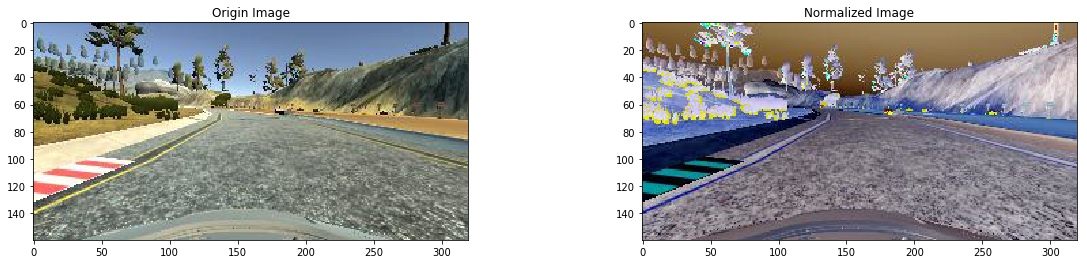

In [3]:
from matplotlib import pyplot as plt

# Plot inline 
%matplotlib inline
fig_size = [20,4]
plt.rcParams["figure.figsize"] = fig_size
img_org = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_r = img_org
img_nor = cv2.normalize(img_org, img_r, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
plt.subplot(121),plt.imshow(img_org),plt.title('Origin Image')
plt.subplot(122),plt.imshow(img_nor),plt.title('Normalized Image')

In [4]:
###Inserting cells for showing images, the flipping of the images is shown in this section

(<matplotlib.axes._subplots.AxesSubplot at 0x298168bb080>,
 <matplotlib.text.Text at 0x29816aeb550>)

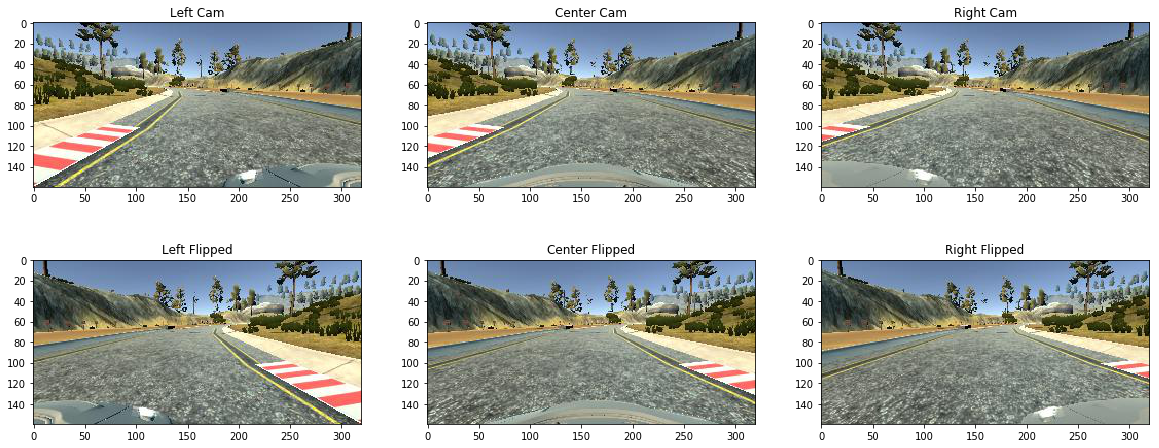

In [5]:
from matplotlib import pyplot as plt

# Plot inline
%matplotlib inline
fig_size = [20,8]
plt.rcParams["figure.figsize"] = fig_size

img0 = cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(images[4], cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(images[3], cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB)
img5 = cv2.cvtColor(images[5], cv2.COLOR_BGR2RGB)


plt.subplot(231),plt.imshow(img0),plt.title('Left Cam')
plt.subplot(232),plt.imshow(img1),plt.title('Center Cam')
plt.subplot(233),plt.imshow(img2),plt.title('Right Cam')

plt.subplot(234),plt.imshow(img3),plt.title('Left Flipped')
plt.subplot(235),plt.imshow(img4),plt.title('Center Flipped')
plt.subplot(236),plt.imshow(img5),plt.title('Right Flipped')

#f.subplots_adjust(hspace=1)

In [6]:
###Inserting cells for showing images, the cropping process is shown in this section

(<matplotlib.axes._subplots.AxesSubplot at 0x298169826a0>,
 <matplotlib.text.Text at 0x29816c36630>)

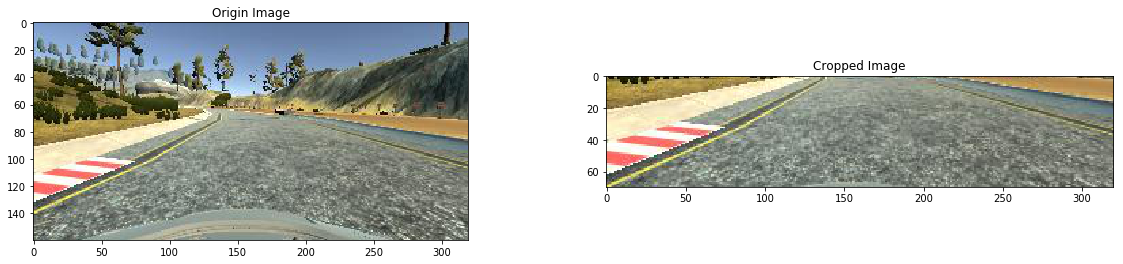

In [7]:
from matplotlib import pyplot as plt

# Plot inline 
%matplotlib inline
fig_size = [20,4]
plt.rcParams["figure.figsize"] = fig_size

img_org = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_crop = img_org[70:140,0:320] # Crop from x, y, w, h -> 100, 200, 300, 400
# NOTE: its img[y: y + h, x: x + w] and *not* img[x: x + w, y: y + h]
plt.subplot(121),plt.imshow(img_org),plt.title('Origin Image')
plt.subplot(122),plt.imshow(img_crop),plt.title('Cropped Image')

In [8]:
###Until now we are appending all the elements from the csv table into our python arrays

In [9]:
print(len(images)," images have been saved")

15534  images have been saved


In [10]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
#creating the training data set
X_train = np.array(images)
y_train = np.array(measurements)

model = Sequential()
#preprocessing with normalization
model.add(Lambda(lambda x: x / 255 - 0.5, input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((75,20), (0,0))))

#add a switch for different solutions option = 1 is using LeNet, option = 2 is NVidea system
model_option = 2

if model_option == 1:
    model.add(Convolution2D(6,5,5,activation="relu"))
    model.add(MaxPooling2D())
    model.add(Convolution2D(6,5,5,activation="relu"))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(120))
    model.add(Dense(84))
    model.add(Dense(1))
    
elif model_option == 2:
    model.add(Convolution2D(24,(5,5),strides=(2,2),activation="relu"))
    model.add(Convolution2D(36,(5,5),strides=(2,2),activation="relu"))
    model.add(Convolution2D(48,(5,5),strides=(2,2),activation="relu"))
    #model.add(Convolution2D(64,(3,3),strides=(2,2),activation="relu"))
    model.add(Convolution2D(64,(1,1),strides=(2,2),activation="relu"))
    model.add(Flatten())
    model.add(Dropout(0.1))
    model.add(Dense(100))
    model.add(Dense(50))
    model.add(Dropout(0.1))
    model.add(Dense(10))
    model.add(Dense(1))


Using TensorFlow backend.


In [11]:
###Add model structure visulization

In [12]:
from keras import utils
#utils.plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True)
#print("Structure saved")

In [13]:
###Train and save the model

In [14]:
#using mean square error to optimize the network
model.compile(loss='mse',optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=3)
model.save('model.h5')
print("data saved")

Train on 12427 samples, validate on 3107 samples
Epoch 1/3
12427/12427 [==============================] - 129s - loss: 0.0186 - val_loss: 0.0500